In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV

In [9]:
df=pd.read_csv("precio_diadm.csv")
print(df)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [10]:
X=df[["carat","depth","table","x","y","z"]]
y=df["cut"]

In [11]:
x_train, x_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4,train_size=0.6)
x_test, x_eval, y_test, y_eval = train_test_split(x_temp,y_temp,test_size = 0.5,train_size =0.5)

In [12]:
print (len(x_train))
print()
print (x_train)

32364

       carat  depth  table     x     y     z
53705   0.60   61.0   57.0  5.43  5.46  3.32
22007   1.73   63.0   57.0  7.64  7.60  4.80
14931   1.22   61.1   58.0  6.84  6.91  4.20
1731    0.32   60.1   60.0  4.42  4.47  2.67
9715    0.30   62.2   57.0  4.26  4.29  2.66
...      ...    ...    ...   ...   ...   ...
10191   1.02   62.0   56.0  6.44  6.46  4.00
42512   0.54   57.2   59.0  5.37  5.32  3.06
35252   0.30   63.0   53.0  4.24  4.30  2.69
23058   2.20   63.3   57.0  8.28  8.17  5.21
26010   0.35   62.3   55.0  4.52  4.56  2.83

[32364 rows x 6 columns]


In [13]:
print (len(x_eval))
print()
print (x_eval)

10788

       carat  depth  table     x     y     z
17239   1.16   61.9   57.0  6.72  6.76  4.17
727     0.34   59.6   62.0  4.54  4.56  2.71
49999   0.59   62.1   55.0  5.38  5.41  3.35
52878   0.74   59.8   58.0  5.89  5.94  3.54
23572   1.28   61.7   55.0  7.01  6.98  4.32
...      ...    ...    ...   ...   ...   ...
45969   0.30   62.4   58.0  4.24  4.28  2.66
4147    1.01   63.9   58.0  6.31  6.37  4.05
41542   0.50   63.7   57.0  5.01  4.94  3.17
22468   1.60   60.0   60.0  7.55  7.59  4.54
10826   1.15   62.0   56.0  6.68  6.75  4.16

[10788 rows x 6 columns]


In [14]:
print (len(x_test))
print()
print (x_test)

10788

       carat  depth  table     x     y     z
43535   0.56   61.7   54.0  5.31  5.33  3.28
41001   0.43   61.8   55.0  4.87  4.90  3.02
32276   0.36   62.5   57.0  4.53  4.56  2.84
39398   0.41   60.4   56.0  4.83  4.80  2.91
36153   0.33   62.3   57.0  4.43  4.40  2.75
...      ...    ...    ...   ...   ...   ...
48212   0.76   59.9   59.0  5.92  5.94  3.55
15933   1.25   61.1   55.0  6.95  6.99  4.26
53365   0.70   63.1   55.0  5.64  5.61  3.55
33805   0.32   61.5   58.0  4.36  4.42  2.70
52463   0.71   63.2   57.0  5.72  5.67  3.60

[10788 rows x 6 columns]


In [15]:
#Me genera el modelo es decir entreno ... ok????
model = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)
print (str(model.classes_))
print (y)

['Fair' 'Good' 'Ideal' 'Premium' 'Very Good']
0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object


In [16]:
#Despues de entrenar el modelo, yo voy a ver como le va en el de evaluacion (20%)
print (str(model.predict_proba(x_eval)))
print (str(model.predict(x_eval)))

[[0.01434328 0.0929848  0.46029881 0.12445107 0.30792204]
 [0.01094193 0.14221852 0.01412591 0.50325771 0.32945592]
 [0.0088807  0.04753853 0.71485934 0.06114544 0.16757599]
 ...
 [0.07534894 0.09539183 0.3812445  0.340754   0.10726073]
 [0.00726034 0.11538525 0.12188142 0.40344225 0.35203073]
 [0.00836125 0.07053606 0.5710896  0.05043835 0.29957474]]
['Ideal' 'Premium' 'Ideal' ... 'Ideal' 'Premium' 'Ideal']


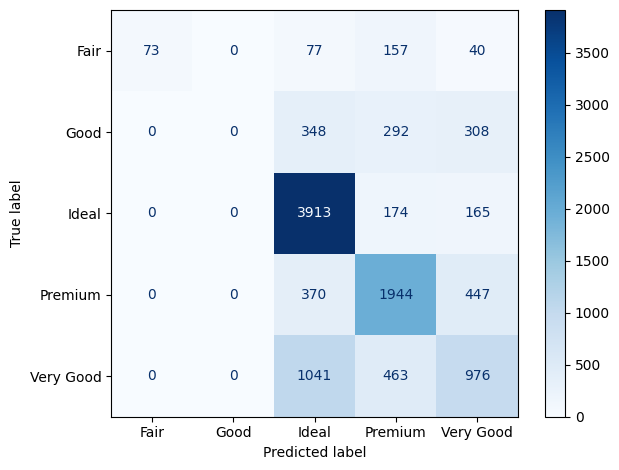

In [17]:
cm_1 = confusion_matrix(y_eval, model.predict(x_eval), labels=model.classes_)
#esta funcion construye el grafico de la matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1,display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.tight_layout()
#Graba el grafico en un archivo
plt.savefig("lr-eval.png")